<a href="https://colab.research.google.com/github/dindahanifa/mechine_learning/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bagian 1 – Deteksi Wajah Menggunakan OpenCV (Contoh code)**

Mengimpor library

In [99]:
import cv2
import matplotlib.pyplot as plt

Mengimput file

In [127]:
from google.colab import files
uploaded = files.upload()

Saving analyst.jpeg to analyst.jpeg


In [133]:
IMG_PATH = "analyst.jpeg"

Muat gambar


In [134]:
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Gambar '{IMG_PATH}' tidak ditemukan. "
                            "Pastikan sudah di-upload ke workspace.")

Konversi ke RGB untuk RetinaFace

In [135]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Deteksi wajah dengan RetinaFace

In [136]:
faces_retina = RetinaFace.detect_faces(img_rgb)

Sumber Haar Cascade bawaan OpenCV

In [137]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +                                "haarcascade_frontalface_default.xml")

Preprocessing & deteksi

In [138]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1,
                                      minNeighbors=5, minSize=(30, 30))

Gambar kotak pada wajah

In [139]:
if isinstance(faces_retina, dict):  # jika ada wajah terdeteksi
    for key, face in faces_retina.items():
        facial_area = face["facial_area"]  # [x1, y1, x2, y2]
        x1, y1, x2, y2 = facial_area

        # Gambar kotak hijau
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Tambahkan label angka urutan wajah
        cv2.putText(img_rgb, f"Wajah {key}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
else:
    print("⚠️ Tidak ada wajah terdeteksi.")

Gambar kotak hijau

In [140]:
cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

array([[[188, 219, 250],
        [188, 219, 250],
        [188, 219, 250],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[188, 219, 250],
        [188, 219, 250],
        [188, 219, 250],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[188, 219, 250],
        [188, 219, 250],
        [188, 219, 250],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       ...,

       [[185, 180, 176],
        [185, 180, 176],
        [184, 179, 175],
        ...,
        [174, 172, 173],
        [171, 169, 170],
        [168, 166, 167]],

       [[181, 176, 172],
        [181, 176, 172],
        [181, 176, 172],
        ...,
        [173, 171, 172],
        [172, 170, 171],
        [169, 167, 168]],

       [[177, 172, 168],
        [176, 171, 167],
        [176, 171, 167],
        ...,
        [168, 166, 167],
        [175, 173, 174],
        [176, 174, 175]]

Tampilkan hasil di Colab

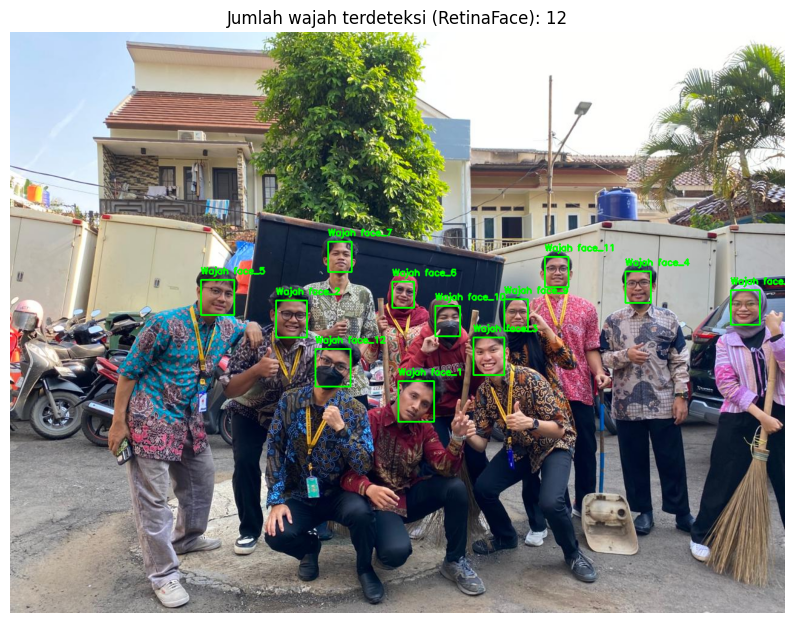

In [141]:
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Jumlah wajah terdeteksi (RetinaFace): {len(faces_retina) if isinstance(faces_retina, dict) else 0}")
plt.show()

**Bagian 2 – Ekstraksi Teks Menggunakan Tesseract OCR (Contoh Code)**

Mengimpor library

In [197]:
%%timeit -n 1 -r 1
import cv2
import pytesseract
import matplotlib.pyplot as plt

17.7 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [37]:
!pip install pytesseract

Konfigurasi input

In [161]:
from google.colab import files
uploaded = files.upload()

Saving nota.jpg to nota.jpg


In [163]:
IMG_PATH = "nota.jpg"

Konversi ke grayscale

In [164]:
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Gambar '{IMG_PATH}' tidak ditemukan. "
                            "Pastikan sudah di-upload ke workspace.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Thresholding (buat teks lebih jelas)

In [165]:
thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31, 10
)

Jalankan OCR

In [166]:
data = pytesseract.image_to_data(thresh, lang='eng', output_type=pytesseract.Output.DICT)

Gabungkan hasil OCR jadi teks lengkap

In [167]:
text_result = "\n".join([data['text'][i] for i in range(len(data['text'])) if data['text'][i].strip() != ''])

Gambar kotak di sekitar teks

In [168]:
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:  # confidence minimal 60%
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, data['text'][i], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

Tampilkan hasil

In [169]:
print("=== Hasil OCR (teks lengkap) ===")
print(text_result)

=== Hasil OCR (teks lengkap) ===
TOKO
DUNIA
JL.
RAYA
SEMANDING
30
DAU
-
MALANG
TELP.
0341
-
8686715
NOTA
NO.
BANYAKNYA
|
NAMA
BARANG
Barang-barang
yang
sudah
dibet
PERRATIAN
dumlah
Rp
|
fidak
dapat
aerbatkanfatukar
Tangggforima,
Hormat
Kami
e
i


Tampilkan gambar

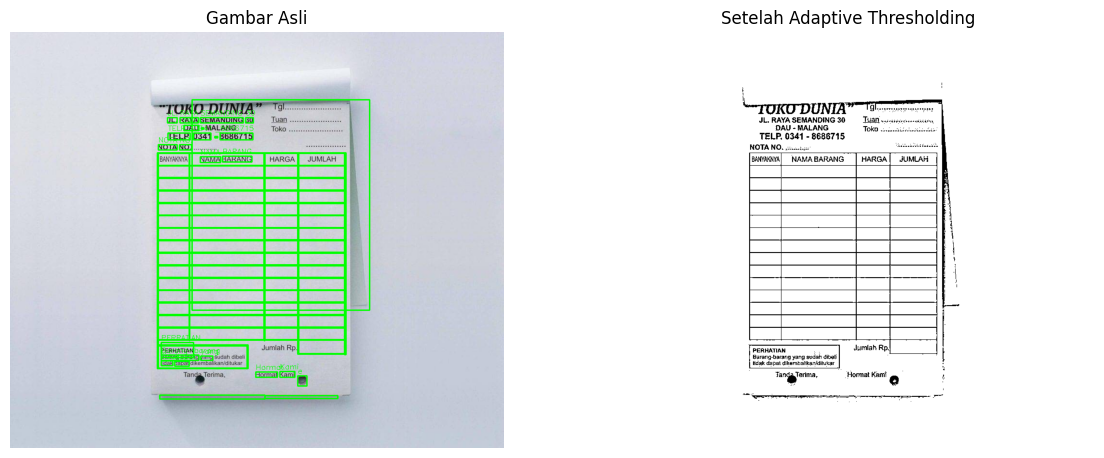

In [170]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(thresh, cmap='gray')
ax[1].set_title("Setelah Adaptive Thresholding")
ax[1].axis("off")

plt.show()

**Bagian 3 - Ekstraksi Teks Menggunakan EasyOCR (Contoh Code)**

Mengimpor library

In [198]:
%%timeit -n 1 -r 1
import cv2
import pytesseract
import matplotlib.pyplot as plt
import easyocr
import torch, torchvision, torchaudio

56.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Konfigurasi input

In [188]:
from google.colab import files
uploaded = files.upload()

Saving tj.jpeg to tj.jpeg


In [189]:
IMG_PATH = "tj.jpeg"

Jalankan OCR dengan EasyOCR

In [190]:
reader = easyocr.Reader(['en', 'id'])  # Bisa pakai bahasa Inggris dan Indonesia
results = reader.readtext(IMG_PATH)

Tampilkan hasil teks dan tingkat kepercayaan

In [191]:
print("=== HASIL EKSTRAKSI TEKS DENGAN EASYOCR ===\n")
for (bbox, text, prob) in results:
    print(f"{text} (Confidence: {prob:.2f})")

=== HASIL EKSTRAKSI TEKS DENGAN EASYOCR ===

7LM (Confidence: 0.13)
Pd, Kelapa (Confidence: 0.87)
Kayuringln (Confidence: 0.48)
Jakasampurna (Confidence: 0.39)
Jatlbenlng (Confidence: 0.75)
Ktan (Confidence: 0.54)
500 (Confidence: 0.74)
odl (Confidence: 0.22)


(Opsional) Tampilkan hasil OCR langsung pada gambar

In [192]:
import cv2
from matplotlib import pyplot as plt

Baca dan tampilkan gambar

In [193]:
img = cv2.imread(IMG_PATH) # Load image for this section
for (bbox, text, prob) in results:
    # Bbox is a list of 4 points, convert to rectangle format (x, y, w, h)
    (x1, y1), (x2, y2), (x3, y3), (x4, y4) = bbox
    x = int(min(x1, x2, x3, x4))
    y = int(min(y1, y2, y3, y4))
    w = int(max(x1, x2, x3, x4) - x)
    h = int(max(y1, y2, y3, y4) - y)

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

Ambil koordinat kotak

In [194]:
    top_left = tuple([int(val) for val in bbox[0]])
    bottom_right = tuple([int(val) for val in bbox[2]])

Gambar kotak dan teks

array([[[146, 132, 114],
        [146, 132, 114],
        [146, 132, 114],
        ...,
        [151, 137, 119],
        [151, 137, 119],
        [151, 137, 119]],

       [[146, 132, 114],
        [146, 132, 114],
        [146, 132, 114],
        ...,
        [151, 137, 119],
        [151, 137, 119],
        [151, 137, 119]],

       [[146, 132, 114],
        [146, 132, 114],
        [146, 132, 114],
        ...,
        [151, 137, 119],
        [151, 137, 119],
        [151, 137, 119]],

       ...,

       [[126, 116, 116],
        [129, 121, 121],
        [129, 121, 121],
        ...,
        [151, 159, 166],
        [151, 159, 166],
        [150, 158, 165]],

       [[121, 111, 111],
        [125, 117, 117],
        [127, 119, 119],
        ...,
        [151, 159, 166],
        [150, 158, 165],
        [150, 158, 165]],

       [[120, 110, 110],
        [122, 114, 114],
        [125, 117, 117],
        ...,
        [150, 158, 165],
        [150, 158, 165],
        [150, 158, 165]]], dtype=uint8)
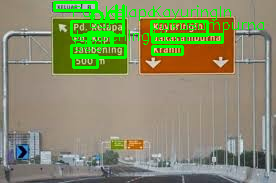

In [195]:
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(img, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

Konversi warna BGR ke RGB untuk ditampilkan

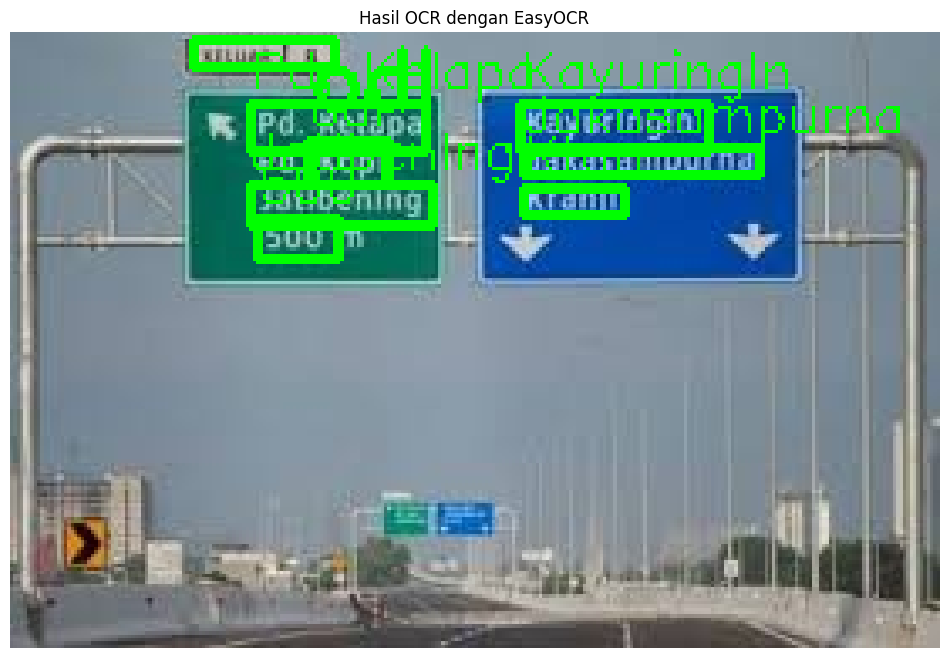

In [196]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hasil OCR dengan EasyOCR")
plt.show()